# This notebook creates some basic visualizations of the data, like most active users in each course

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

def create_stacked_bar_chart(raw_metrics, subject, path_to_static_folder):

    # Assuming raw_metrics is already loaded
    metrics = ['created_new_topic', 'likes_given', 'likes_received', 'replied', 'solved_a_topic']

    # Set colors for different metrics
    colors = ['#FF6B6B', '#54A0FF', '#1DD1A1', '#F368E0', '#10AC84']

    # Filter out metrics where all users have value 0
    filtered_metrics = raw_metrics.set_index('acting_username')[metrics].loc[:, (raw_metrics[metrics] != 0).any()]

    # Plot only if there are metrics left after filtering
    if not filtered_metrics.empty:
        ax = filtered_metrics.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors[:len(filtered_metrics.columns)])

        # Add text annotations (excluding zeros)
        for container in ax.containers:
            labels = [f"{int(val)}" if val > 0 else "" for val in container.datavalues]  # Hide 0 values
            ax.bar_label(container, labels=labels, label_type='center')

        plt.xlabel('Engagement Count')
        plt.ylabel('Users')
        plt.title(f'Most Active users ({subject})')
        plt.legend(title='Activity Type', bbox_to_anchor=(1, 1))
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        # plt.show()
        # Save the plot as an image
        viz_folder = os.path.join(path_to_static_folder,"visualizations")
        os.makedirs(viz_folder, exist_ok=True)
        plt.savefig(f'{viz_folder}/most_active_users_{subject}.png')

    else:
        print("No non-zero metrics to display.")


In [14]:
file_path = "../subject_wise_engagement/course_excel_data_t1_2024"
os.listdir(file_path)

['Database Management Systems.xlsx',
 'English II.xlsx',
 'Machine Learning Foundations.xlsx',
 'Modern Application Development I.xlsx',
 'Programming in Python.xlsx']

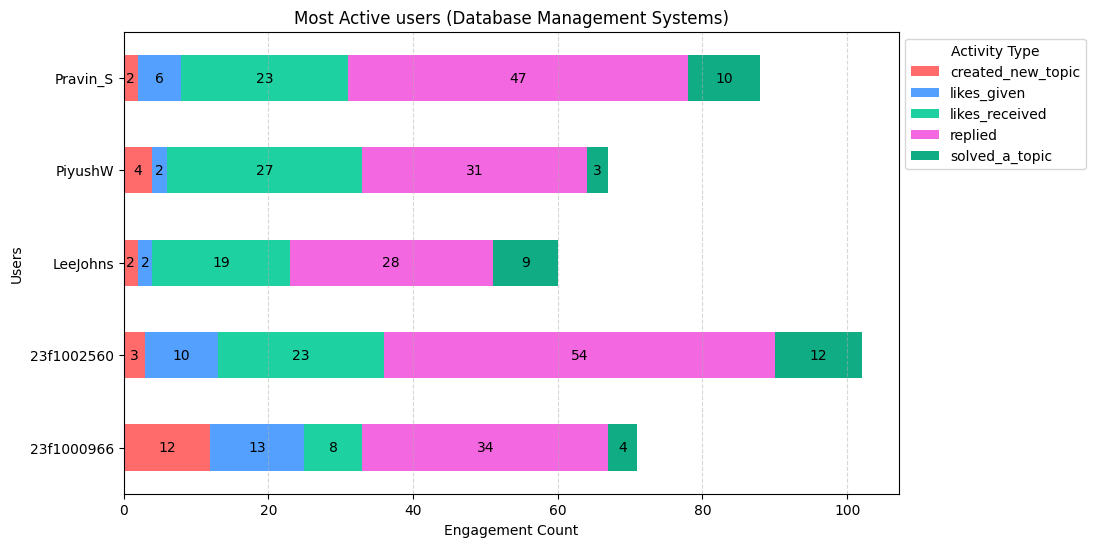

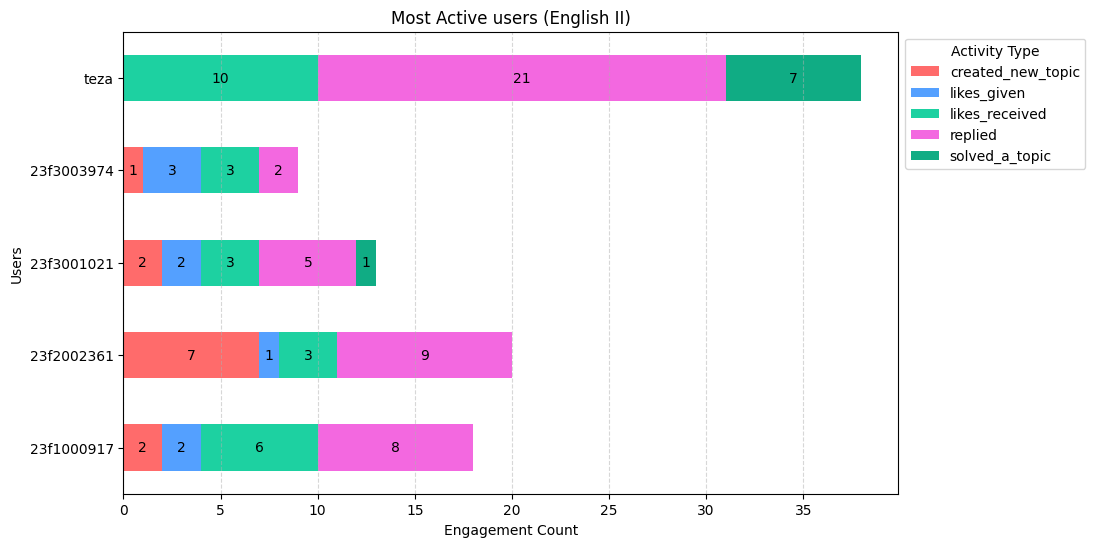

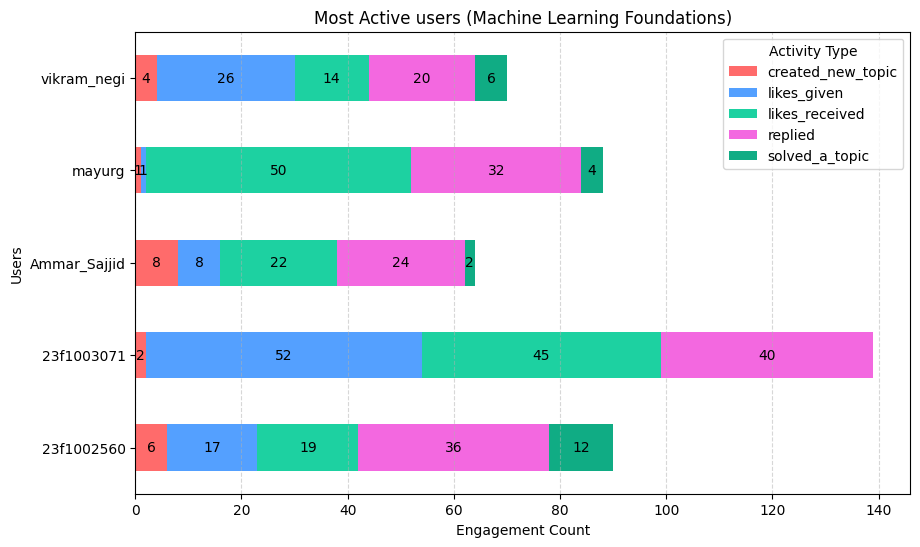

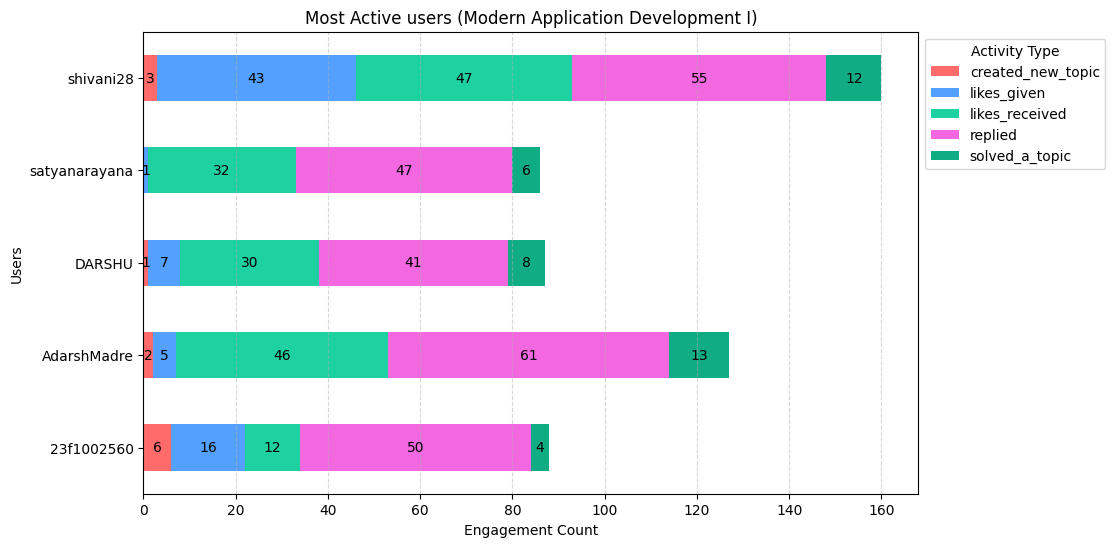

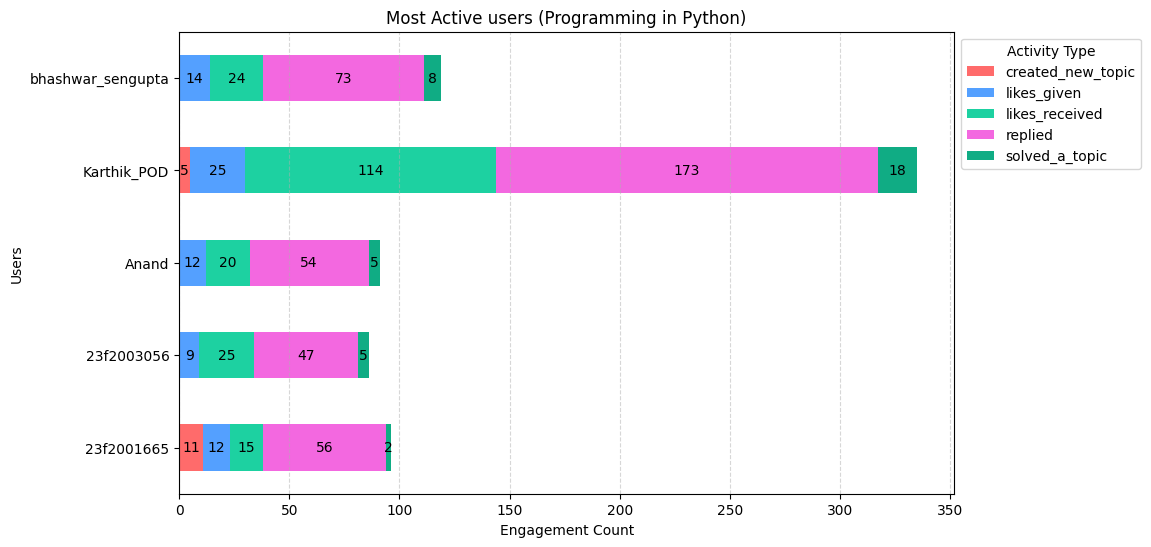

In [17]:
path_to_static_folder = "../static"
for file in os.listdir(file_path)[:]:
    full_path = os.path.join(file_path, file)
    # The sheet name of our interest is "log_normalized_scores". Open this sheet from the excel, get the data and find the name of first 5 users
    log_normalized_df = pd.read_excel(full_path, sheet_name="log_normalized_scores")
    top_5 = log_normalized_df.head().acting_username.to_list()

    raw_metrics = pd.read_excel(full_path, sheet_name="raw_metrics")
    raw_metrics = raw_metrics[raw_metrics.acting_username.isin(top_5)]
    create_stacked_bar_chart(raw_metrics, file.removesuffix(".xlsx"), path_to_static_folder)

In [10]:
raw_metrics.columns

Index(['acting_username', 'created_new_topic', 'likes_given', 'likes_received',
       'replied', 'solved_a_topic', 'initial_score', 'z_score'],
      dtype='object')